In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [60]:
#dataframe and plotting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)


In [4]:
# Try to read the CSV file, handling bad lines
# by skipping them and using the Python engine
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data/vehicles.csv", on_bad_lines='skip', engine='python')


In [5]:
# Display some info about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [6]:
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [7]:
df.tail()


,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
426875,7301591192,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,...,NaN,sedan,NaN,https://images.craigslist.org/00o0o_iiraFnHg8q...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600
426876,7301591187,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,...,NaN,sedan,red,https://images.craigslist.org/00x0x_15sbgnxCIS...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600
426877,7301591147,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,...,NaN,hatchback,white,https://images.craigslist.org/00L0L_farM7bxnxR...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600
426878,7301591140,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,...,NaN,sedan,silver,https://images.craigslist.org/00z0z_bKnIVGLkDT...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600
426879,7301591129,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2019.0,bmw,4 series 430i gran coupe,good,NaN,...,NaN,coupe,NaN,https://images.craigslist.org/00Y0Y_lEUocjyRxa...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:07-0600


**data cleaning**

In [8]:
df.shape


(426880, 26)

In [9]:
# Total count and percentage of null values in each column
null_counts = df.isnull().sum()
null_percentages = (df.isnull().sum() / len(df)) * 100

# Combine into a single DataFrame for better readability
null_summary = pd.DataFrame({
    'Null Count': null_counts,
    'Null Percentage': null_percentages.round(2)
})

# Display the summary
print(null_summary)


              Null Count  Null Percentage
id                     0             0.00
url                    0             0.00
region                 0             0.00
region_url             0             0.00
price                  0             0.00
year                1205             0.28
manufacturer       17646             4.13
model               5277             1.24
condition         174104            40.79
cylinders         177678            41.62
fuel                3013             0.71
odometer            4400             1.03
title_status        8242             1.93
transmission        2556             0.60
VIN               161042            37.73
drive             130567            30.59
size              306361            71.77
type               92858            21.75
paint_color       130203            30.50
image_url             68             0.02
description           70             0.02
county            426880           100.00
state                  0          

In [10]:
# check duplicated record
df.duplicated().sum()  # df[df.duplicated()]

0

In [11]:
# check what every column have
for col in df.columns:
    print( col,':', df[col].nunique())
    print(df[col].value_counts().nlargest(3))
    print('\n' + '*' * 20 + '\n')

id : 426880
id
7222695916    1
7313139418    1
7313423023    1
Name: count, dtype: int64

********************

url : 426880
url
https://prescott.craigslist.org/cto/d/prescott-2010-ford-ranger/7222695916.html           1
https://nh.craigslist.org/cto/d/troy-1998-dodge-ram-59-cummins/7313139418.html            1
https://nh.craigslist.org/ctd/d/north-hampton-2012-hyundai-sante-fe-se/7313423023.html    1
Name: count, dtype: int64

********************

region : 404
region
columbus                   3608
jacksonville               3562
spokane / coeur d'alene    2988
Name: count, dtype: int64

********************

region_url : 413
region_url
https://spokane.craigslist.org    2988
https://eugene.craigslist.org     2985
https://fresno.craigslist.org     2983
Name: count, dtype: int64

********************

price : 15655
price
0       32895
6995     3169
7995     3129
Name: count, dtype: int64

********************

year : 114
year
2017.0    36420
2018.0    36369
2015.0    31538
Name: count,

**Issues found**
1. Null/missing values : fill the cells or drop rows if necessary
2. Unnnecessary columns (eg:region_url)
3. Data types issues
4. Colunm "county" have zero non-null values
5. Potential outliars
6. Non-Imputable Data: VIN, lat, and long columns



In [12]:
# drop unrelevent colunms: URLs and description colunms, are unlikely to contribute to analysis
# drop county colunm bcs it have no values (completely null)
to_drop = ['url', 'region_url', 'image_url', 'description', 'county', 'size', 'VIN', 'posting_date']
df.drop(columns = to_drop, inplace=True)


In [13]:
df.isnull().sum()

,0
id,0
region,0
price,0
year,1205
manufacturer,17646
model,5277
condition,174104
cylinders,177678
fuel,3013
odometer,4400


In [16]:
# Impute missing values for numerical columns with their median
numeric_cols = ['year', 'odometer']
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median())

# Impute missing categorical values with their mode
categorical_cols = ['manufacturer', 'model', 'condition', 'cylinders',
                    'fuel', 'title_status', 'drive', 'type', 'paint_color', 'transmission']
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


In [17]:
df.isnull().sum()

,0
id,0
region,0
price,0
year,0
manufacturer,0
model,0
condition,0
cylinders,0
fuel,0
odometer,0


In [20]:
#correct data types: year to integer
df['year'] = df['year'].astype(int)

In [21]:
df.head(3)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,lat,long
0,7222695916,prescott,6000,2013,ford,f-150,good,6 cylinders,gas,85548.0,clean,automatic,4wd,sedan,white,az,NaN,NaN
1,7218891961,fayetteville,11900,2013,ford,f-150,good,6 cylinders,gas,85548.0,clean,automatic,4wd,sedan,white,ar,NaN,NaN
2,7221797935,florida keys,21000,2013,ford,f-150,good,6 cylinders,gas,85548.0,clean,automatic,4wd,sedan,white,fl,NaN,NaN


In [18]:
df['price'].describe()

,price
count,4.268800e+05
mean,7.519903e+04
std,1.218228e+07
min,0.000000e+00
25%,5.900000e+03
50%,1.395000e+04
75%,2.648575e+04
max,3.736929e+09


In [27]:
#finding the max value and min value in the price colunm
max_price = df['price'].max()
min_price = df['price'].min()
print(max_price)
print(min_price)

3736928711
0


In [31]:
# Selecting only prices between $400 and $90,000
# These values were chosen because of the large number of outliers in the boxplot
sample_prices = df.loc[(df.price >= 400) & (df.price <= 90000)]
sample_prices.price.describe()


,price
count,385049.000000
mean,19045.358697
std,14277.829837
min,400.000000
25%,7600.000000
50%,15800.000000
75%,27988.000000
max,90000.000000


**EDA**

**1. Which car types are most common?**

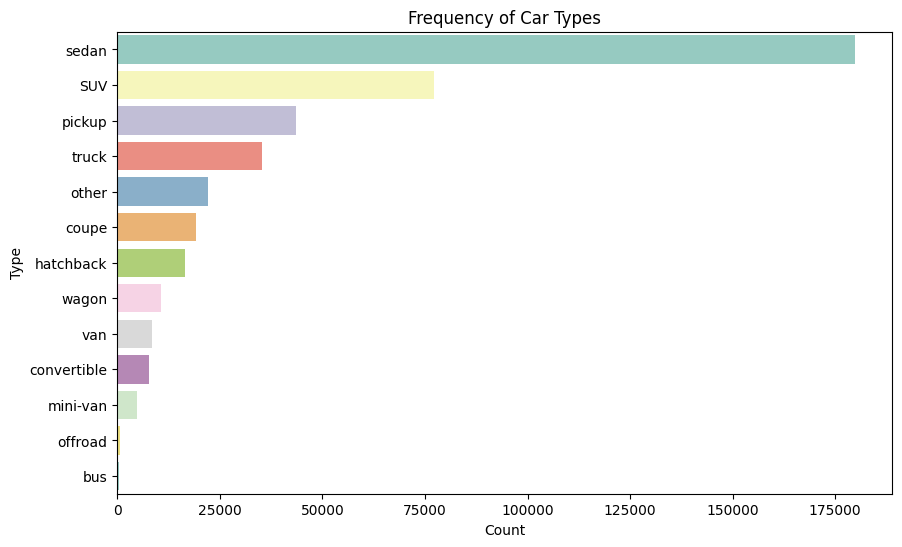

In [61]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='type', palette='Set3', order=df['type'].value_counts().index)
plt.title('Frequency of Car Types')
plt.xlabel('Count')
plt.ylabel('Type')
plt.show()

**2. What is the average price of used cars by manufacturer?**

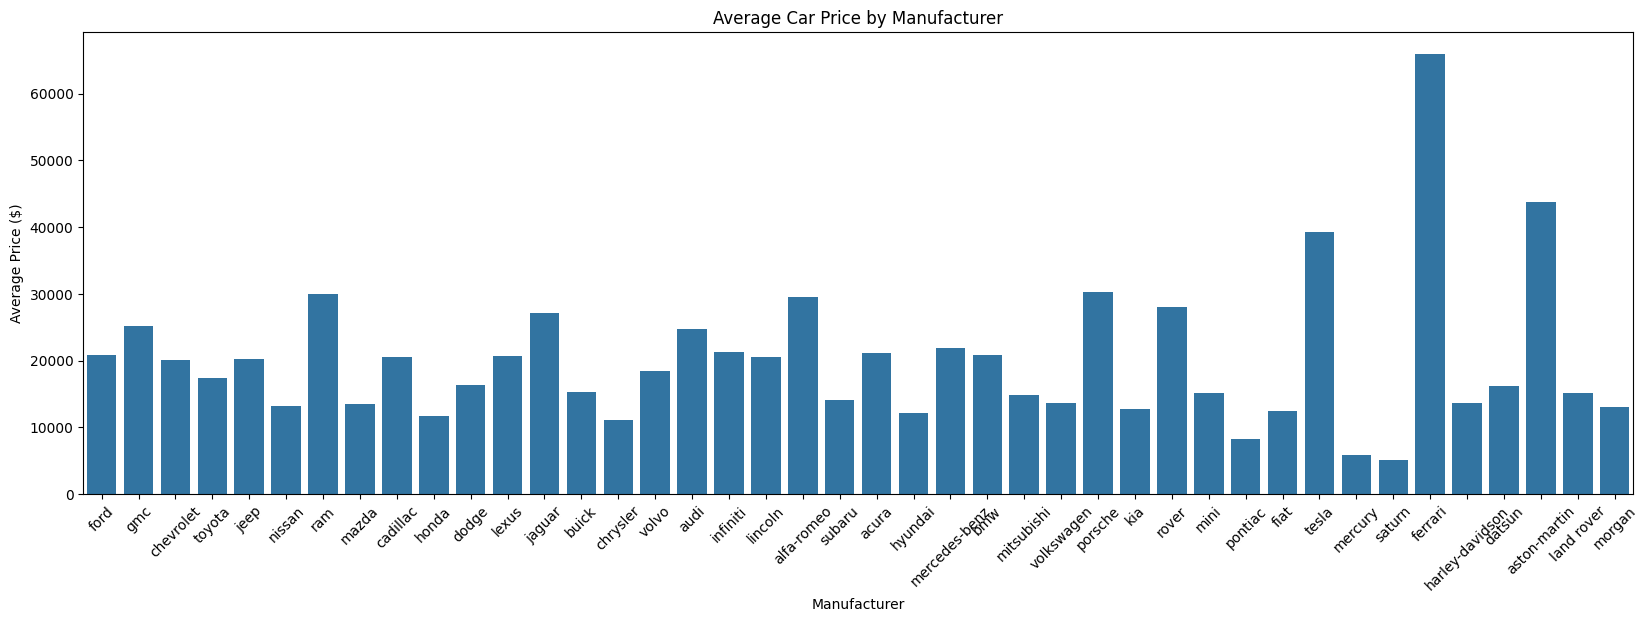

In [62]:
plt.figure(figsize=(20, 6))
sns.barplot(data=sample_prices, x='manufacturer', y= 'price', ci=None)
plt.xticks(rotation=45)
plt.title('Average Car Price by Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Average Price ($)')
plt.show()


**3. How does paint color affect price?**

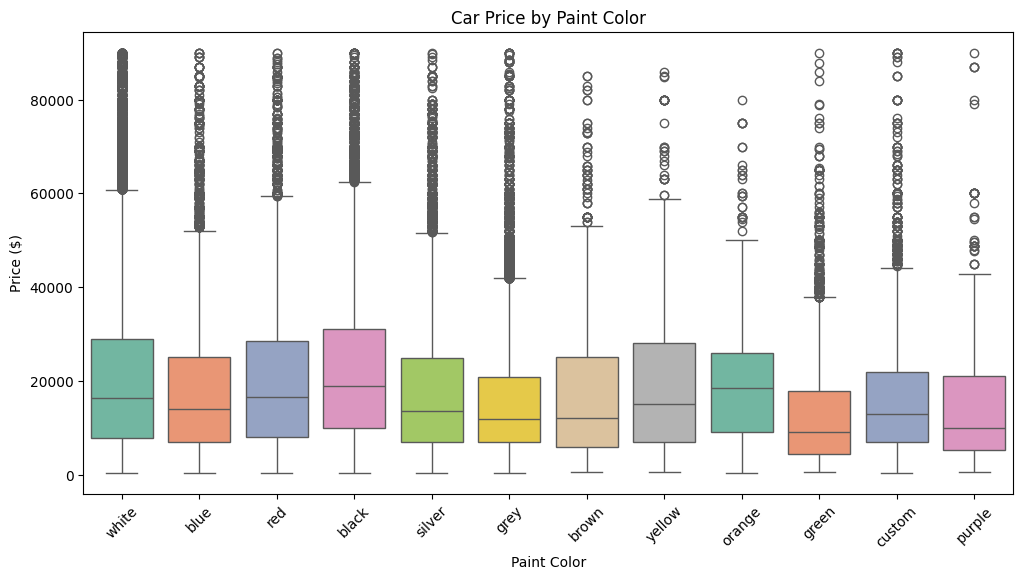

In [63]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=sample_prices, x='paint_color', y='price', palette='Set2')
plt.xticks(rotation=45)
plt.title('Car Price by Paint Color')
plt.xlabel('Paint Color')
plt.ylabel('Price ($)')
plt.show()


**4. How does car condition affect price?**

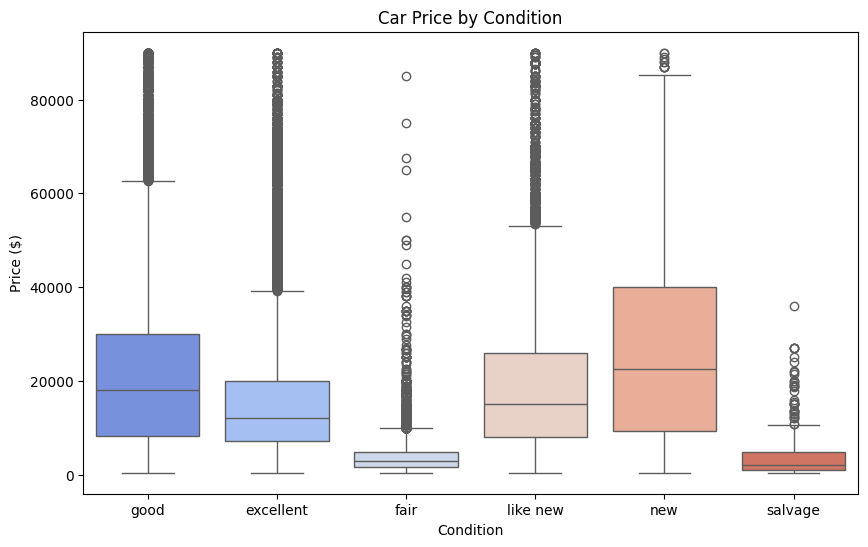

In [64]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=sample_prices, x='condition', y='price', palette='coolwarm')
plt.title('Car Price by Condition')
plt.xlabel('Condition')
plt.ylabel('Price ($)')
plt.show()


**5. Which states have the highest number of car listings?**

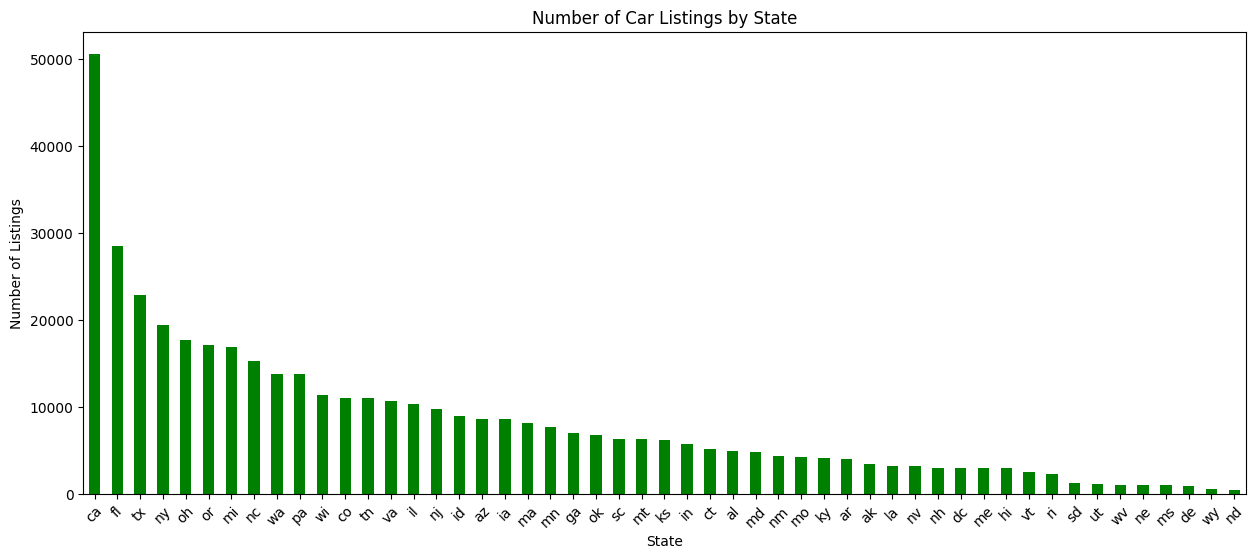

state
ca    50614
fl    28511
tx    22945
ny    19386
oh    17696
Name: count, dtype: int64


In [54]:
# Count the number of listings by state
listings_by_state = df['state'].value_counts()

# Plot
plt.figure(figsize=(15, 6))
listings_by_state.plot(kind='bar', color='green')
plt.title('Number of Car Listings by State')
plt.xlabel('State')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.show()

# Print top states with highest listings
print(listings_by_state.head())


**6. What is the relationship between drive type and price?**

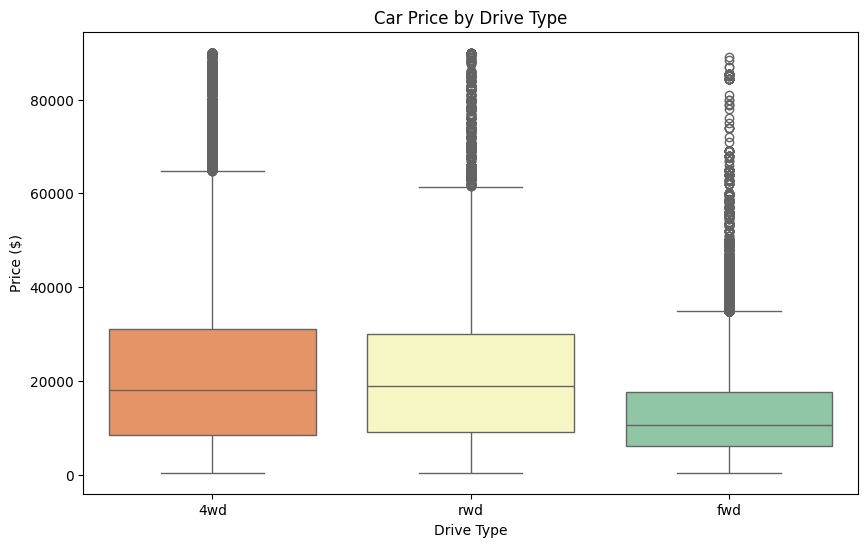

In [65]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=sample_prices, x='drive', y='price', palette='Spectral')
plt.title('Car Price by Drive Type')
plt.xlabel('Drive Type')
plt.ylabel('Price ($)')
plt.show()


**7. What is the average price of used cars by state?**

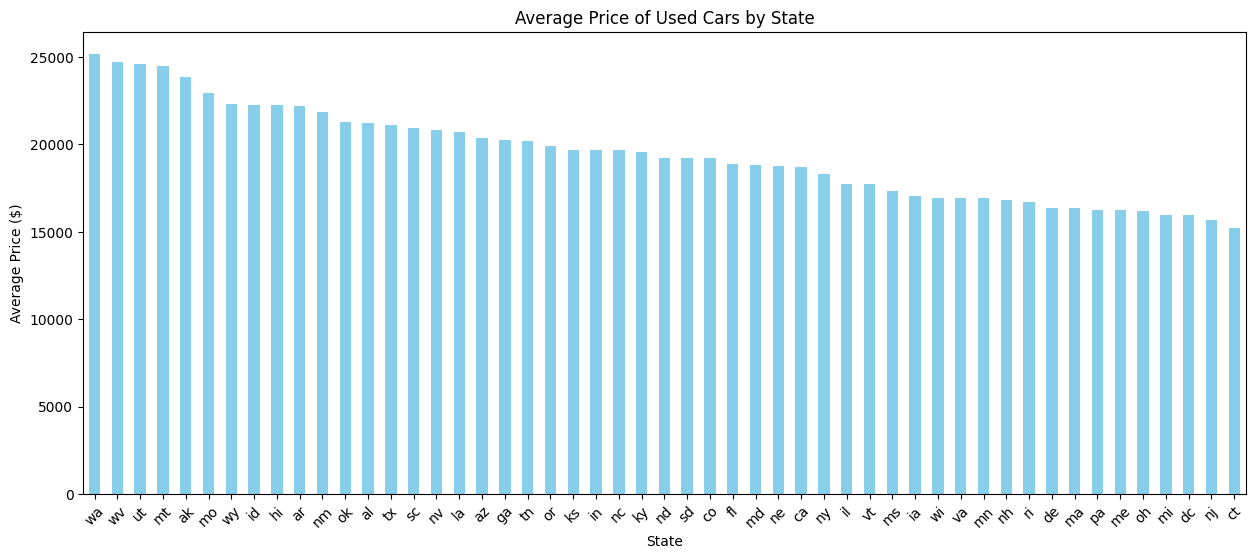

state
wa    25177.094675
wv    24743.937437
ut    24619.970297
mt    24485.663103
ak    23862.826596
Name: price, dtype: float64


In [48]:
# Group by state and calculate average price
avg_price_by_state = sample_prices.groupby('state')['price'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(15, 6))
avg_price_by_state.plot(kind='bar', color='skyblue')
plt.title('Average Price of Used Cars by State')
plt.xlabel('State')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45)
plt.show()

# Print top states with highest average prices
print(avg_price_by_state.head())


**8. How does odometer vary with car price?**

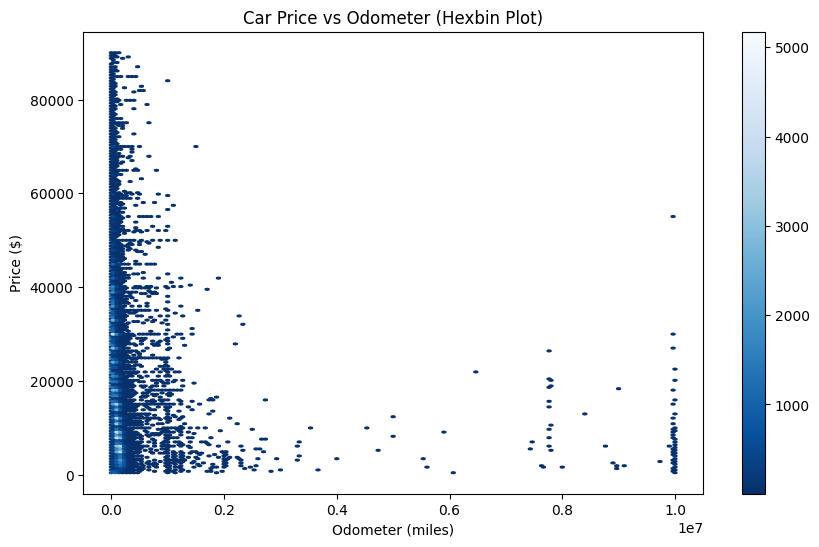

In [58]:
# Hexbin plot for car price vs. odometer
plt.figure(figsize=(10, 6))
plt.hexbin(sample_prices['odometer'], sample_prices['price'], gridsize=(150,150), cmap=plt.cm.Blues_r, mincnt=1)
plt.title('Car Price vs Odometer (Hexbin Plot)')
plt.xlabel('Odometer (miles)')
plt.ylabel('Price ($)')
cb = plt.colorbar()
cb.set_label('Number of Cars')
plt.show()
